### Importing Libraries


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading The Data

In [9]:
data_frame = pd.read_csv("data.csv")
# X,y must be of type of ndArray not a pd.DataFrame
X = data_frame.iloc[:,1:14].values
y = data_frame.iloc[:,-1].values

In [10]:
X

array([[104.,   8.,   1., ...,   3.,   1.,   8.],
       [101.,   8.,   0., ...,   3.,   1.,   0.],
       [137.,   8.,   1., ...,   3.,   1.,  13.],
       ...,
       [  3.,   1.,   1., ...,   3.,   1.,   0.],
       [ 24.,   9.,   1., ...,   3.,   1.,   0.],
       [ 15.,  27.,   1., ...,   3.,   1.,   0.]])

### Splitting Data

In [50]:
from sklearn.model_selection import train_test_split

# Test set is 20% of the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) 

### K-Nearest Negihbors

In [51]:
from sklearn.preprocessing import MinMaxScaler
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)

#### picking the best KNN Model

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import KFold
n_splits = 10  

# Recall is more important than precision when the cost of acting is low
score = accuracy_score

max_score = 0
best_knn_classifier = 0
# finding the best K that gives the best score on the validation set
# the size of trainig is 690 so the max_k = 26
max_k = 26
for k in range(1, max_k, 2):

    kf = KFold(n_splits=n_splits)
    for train_index, test_index in kf.split(X_train):

        X_val_train, X_val_test = X_train_norm[train_index], X_train_norm[test_index]
        y_val_train, y_val_test = y_train[train_index], y_train[test_index]

        # create a new KNN model
        knn_model = KNeighborsClassifier(n_neighbors=k)

        # fitting to the y_val_training data
        knn_model.fit(X_val_train, y_val_train)

        # prediction
        y_val_predicted = knn_model.predict(X_val_test)

        # The score resulted from the prediction on y_val_test
        cv_score = score(y_true=y_val_test, y_pred=y_val_predicted)
        
        if cv_score > max_score:
            best_knn_classifier = knn_model
            max_score = cv_score

print(f"best-k = {best_knn_classifier.n_neighbors}")



best-k = 7


#### Testing

knn_model_f1-score = 0.5652173913043478
knn_model-precision = 0.6190476190476191
knn_model-Recall = 0.52


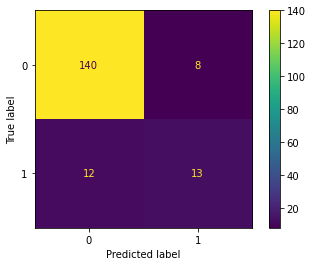

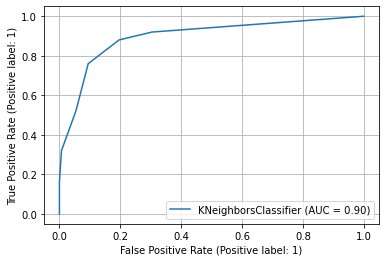

In [53]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# making predictions
y_pred_knn = best_knn_classifier.predict(X_test_norm)

# Confusion Matrix
plot_confusion_matrix(best_knn_classifier, X_test_norm, y_test)

# Precision, Recall, f1-score
print(f"knn_model_f1-score = {f1_score(y_test, y_pred_knn)}\nknn_model-precision = {precision_score(y_test,y_pred_knn)}\nknn_model-Recall = {recall_score(y_test,y_pred_knn)}")

# ROC curve
plot_roc_curve(best_knn_classifier, X_test_norm, y_test)
plt.grid()



### Logistic Regression


#### HyperParameters Tuning

In [116]:
# Identifing differenet hyperparameter to tune
param_grid = [
    {
        'penalty': ['l2', 'none'],
        'C':np.logspace(-2, 2, 10),
        'max_iter':[1000,1500,2000]
    }
]


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_classifier = LogisticRegression()

# GridSearchCV finds the best combinatins of the hyperparameters in param_grid 
# the score to log_clf_cv which is the best classifier is Recall
log_clf_cv = GridSearchCV(log_classifier, param_grid, cv=10, scoring='recall')


In [118]:
best_log_clf = log_clf_cv.fit(X_train,y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [119]:
best_log_clf.best_estimator_

LogisticRegression(C=0.01, max_iter=1000, penalty='none')

knn_model_f1-score = 0.7999999999999999
knn_model-precision = 0.9
knn_model-Recall = 0.72


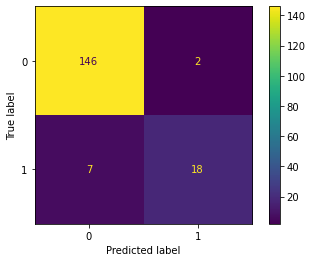

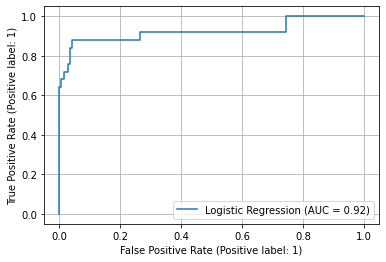

In [132]:
from sklearn.metrics import plot_confusion_matrix, auc, roc_curve, RocCurveDisplay,plot_roc_curve

# making predictions
y_predict_log = best_log_clf.predict(X_test)

# Confusion Matrix
plot_confusion_matrix(best_log_clf, X_test, y_test)

# Precision, Recall, f1-score
print(f"knn_model_f1-score = {f1_score(y_test, y_predict_log)}\nknn_model-precision = {precision_score(y_test,y_predict_log)}\nknn_model-Recall = {recall_score(y_test,y_predict_log)}")

# ROC curve
plot_roc_curve(best_log_clf, X_test, y_test, name='Logistic Regression')
plt.grid()



### Naïve Bayes

f1-score = 0.41071428571428575


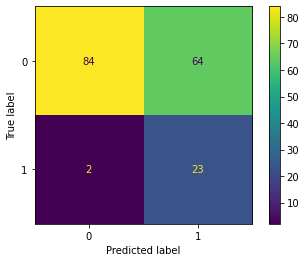

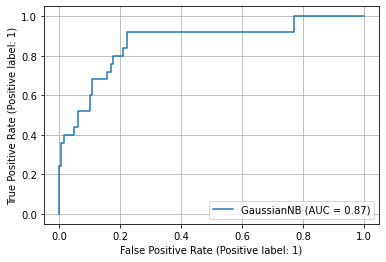

In [120]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)

# Confusion Matrix 
plot_confusion_matrix(gnb, X_test, y_test)

# f1-score
print(f"f1-score = {f1_score(y_test, y_pred)}")

# ROC curve 
plot_roc_curve(gnb, X_test, y_test)
plt.grid()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

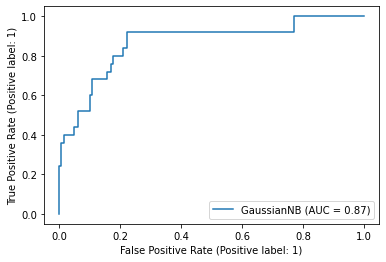

In [121]:
plot_roc_curve(gnb, X_test, y_test)
plot_roc_curve(log_classifier, X_test, y_test)
